# Procesamiento Digital de Imagenes - TP1

## Constantes y funciones

Importando bibliotecas

In [361]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from skimage  import color

Definiendo funciones y constantes

### Definiendo los valores de Y, I y Q para indexar 

In [362]:
Y = 0; I = 1; Q = 2

### Interpolacion para obtener Ic y Qc

In [363]:
def interpolate(image_a_YIQ, image_b_YIQ, image_c):
  denominator = image_a_YIQ[:,:,Y] + image_b_YIQ[:,:,Y]
  image_c[:,:,1] = (image_a_YIQ[:,:,Y]*image_a_YIQ[:,:,I] + image_b_YIQ[:,:,Y]*image_b_YIQ[:,:,I])/denominator
  image_c[:,:,2] = (image_a_YIQ[:,:,Y]*image_a_YIQ[:,:,Q] + image_b_YIQ[:,:,Y]*image_b_YIQ[:,:,Q])/denominator
  return image_c

### Suma clampeada en RGB

In [364]:
def clampled_sum_RGB(image_a, image_b):
  image_c = np.zeros([image_a.shape[0], image_a.shape[1], 3], dtype = np.uint8)
  image_c.fill(255)

  # Sumando y clampeando los valores
  image_c[:,:,0] = np.clip(image_a[:,:,0] + image_b[:,:,0], a_min = 0, a_max = 255)
  image_c[:,:,1] = np.clip(image_a[:,:,1] + image_b[:,:,1], a_min = 0, a_max = 255)
  image_c[:,:,2] = np.clip(image_a[:,:,2] + image_b[:,:,2], a_min = 0, a_max = 255)

  return image_c

### Suma promediada en RGB

In [365]:
def averaged_sum_RGB(image_a, image_b):
  image_c = np.zeros([image_a.shape[0], image_a.shape[1], 3], dtype = np.uint8)
  image_c.fill(255)

  # Sumando
  image_c[:,:,0] = image_a[:,:,0]/2 + image_b[:,:,0]/2
  image_c[:,:,1] = image_a[:,:,1]/2 + image_b[:,:,1]/2
  image_c[:,:,2] = image_a[:,:,2]/2 + image_b[:,:,2]/2

  return image_c

### Suma clampeada en YIQ

In [366]:
def clamped_sum_YIQ(image_a, image_b):
  # Transformando a YIQ
  image_a_YIQ = color.rgb2yiq(image_a)
  image_b_YIQ = color.rgb2yiq(image_b)

  image_c = np.zeros([image_a.shape[0], image_a.shape[1], 3])
  image_c.fill(255)

  # Interpolando para obtener Ic y Qc
  image_c = interpolate(image_a_YIQ, image_b_YIQ, image_c)
  
  # Clampeando Y tal que si es mayor que 1, valga 1
  image_c[:,:,Y] = np.clip(image_a_YIQ[:,:,Y] + image_b_YIQ[:,:,Y], a_min = 0, a_max = 1)

  return color.yiq2rgb(image_c)

### Suma promediada en YIQ

In [367]:
def averaged_sum_YIQ(image_a, image_b):
  # Transformando a YIQ
  image_a_YIQ = color.rgb2yiq(image_a)
  image_b_YIQ = color.rgb2yiq(image_b)

  image_c = np.zeros([image_a.shape[0], image_a.shape[1], 3])
  image_c.fill(255)

  # Interpolando para obtener Ic y Qc
  image_c = interpolate(image_a_YIQ, image_b_YIQ, image_c)
  
  # Promediando Y
  image_c[:,:,Y] = (image_a_YIQ[:,:,Y] + image_b_YIQ[:,:,Y])/2

  return color.yiq2rgb(image_c)

### If-Lighter

In [368]:
def sum_if_lighter(image_a, image_b):
  # Transformando a YIQ
  image_a_YIQ = color.rgb2yiq(image_a)
  image_b_YIQ = color.rgb2yiq(image_b)
    
  image_c = np.zeros([image_a.shape[0], image_a.shape[1], 3])
    
  for p_y in range(image_a.shape[0]):
      for p_x in range(image_a.shape[1]):
          if image_a_YIQ[p_y,p_x,Y] >  image_b_YIQ[p_y,p_x,Y]:
              image_c[p_y, p_x, :] = image_a_YIQ[p_y, p_x, :]
          else: 
              image_c[p_y, p_x, :] = image_b_YIQ[p_y, p_x, :]
  return color.yiq2rgb(image_c)

### If-Darker

In [369]:
def subtract_if_darker(image_a, image_b):
  # Transformando a YIQ
  image_a_YIQ = color.rgb2yiq(image_a)
  image_b_YIQ = color.rgb2yiq(image_b)
    
  image_c = np.zeros([image_a.shape[0], image_a.shape[1], 3])
    
  for p_y in range(image_a.shape[0]):
      for p_x in range(image_a.shape[1]):
          if image_a_YIQ[p_y,p_x,Y] <  image_b_YIQ[p_y,p_x,Y]:
              image_c[p_y, p_x, :] = image_a_YIQ[p_y, p_x, :]
          else: 
              image_c[p_y, p_x, :] = image_b_YIQ[p_y, p_x, :]
  return color.yiq2rgb(image_c)

### Resta clampeada en RGB

In [370]:
def clampled_substract_RGB(image_a, image_b):
  image_c = np.zeros([image_a.shape[0], image_a.shape[1], 3], dtype = np.uint8)
  image_c.fill(255)

  # Sumando y clampeando los valores
  image_c[:,:,0] = np.clip(image_a[:,:,0] - image_b[:,:,0], a_min = 0, a_max = 255)
  image_c[:,:,1] = np.clip(image_a[:,:,1] - image_b[:,:,1], a_min = 0, a_max = 255)
  image_c[:,:,2] = np.clip(image_a[:,:,2] - image_b[:,:,2], a_min = 0, a_max = 255)

  return image_c

### Resta promediada en RGB

In [371]:
def averaged_substract_RGB(image_a, image_b):
  image_c = np.zeros([image_a.shape[0], image_a.shape[1], 3], dtype = np.uint8)
  image_c.fill(255)

  # Sumando
  image_c[:,:,0] = ( image_a[:,:,0]/2 - image_b[:,:,0]/2 ) + 127
  image_c[:,:,1] = ( image_a[:,:,1]/2 - image_b[:,:,1]/2 ) + 127
  image_c[:,:,2] = ( image_a[:,:,2]/2 - image_b[:,:,2]/2 ) + 127

  return image_c

## Cargando imagenes y realizando las operaciones

### Carga de imagenes

In [372]:
image_a = imageio.imread('imageio:chelsea.png')
image_b = imageio.imread('imageio:immunohistochemistry.png')
image_b = image_b[0:image_a.shape[0], 0:image_a.shape[1], :]

In [373]:
image_a.shape

(300, 451, 3)

In [374]:
image_b.shape

(300, 451, 3)

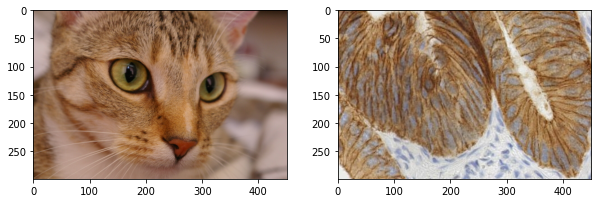

In [375]:
_, axarr = plt.subplots(1, 2, figsize=(10,10))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)

### Suma clampeada en RGB

In [376]:
image_c = clampled_sum_RGB(image_a, image_b)

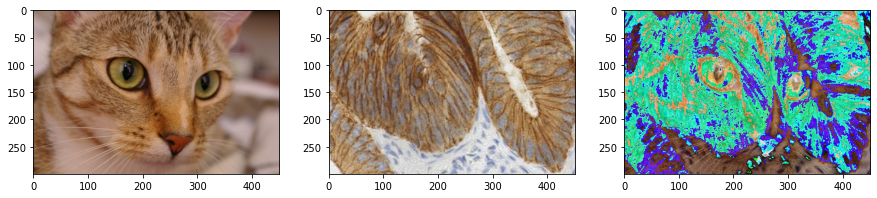

In [377]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)
axarr[2].imshow(image_c)

La suma clampeada en RGB produce deriva cromatica

### Suma promediada en RGB

In [378]:
image_c = averaged_sum_RGB(image_a, image_b)

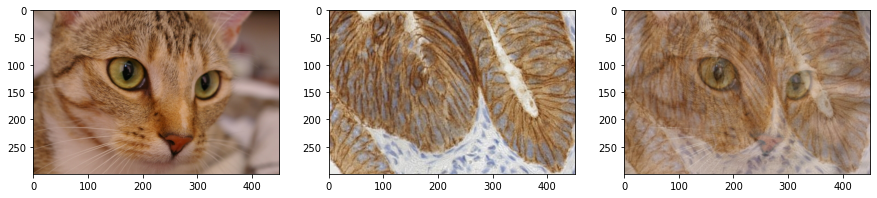

In [379]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)
axarr[2].imshow(image_c)

La imagen resultante es mas oscura que la imagen original

### Suma clampeada en YIQ

In [380]:
image_c = clamped_sum_YIQ(image_a, image_b)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


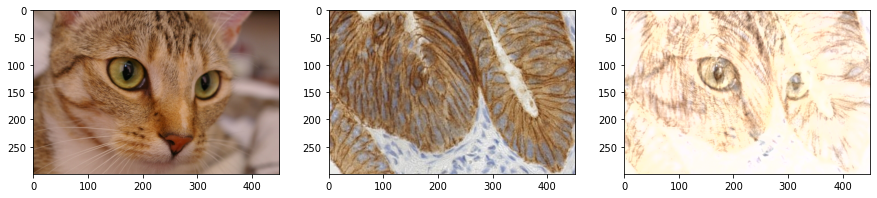

In [381]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)
axarr[2].imshow(image_c)

### Suma promediada en YIQ

In [382]:
image_c = averaged_sum_YIQ(image_a, image_b)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


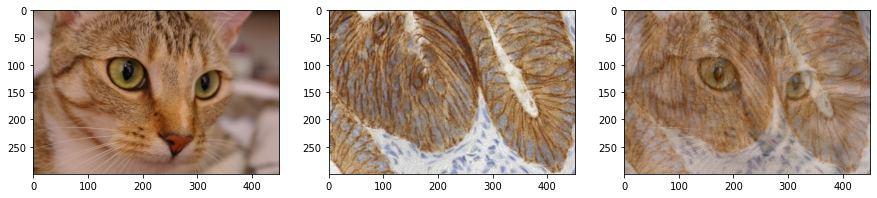

In [383]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)
axarr[2].imshow(image_c)

### If-Lighter

In [384]:
image_c = sum_if_lighter(image_a, image_b)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


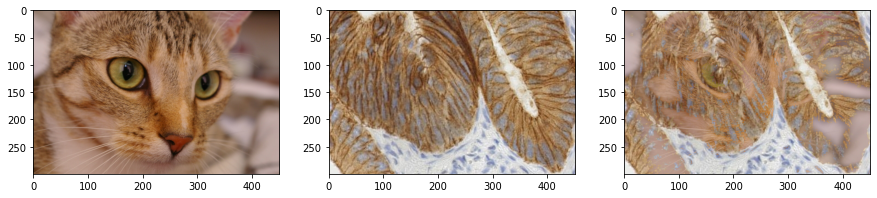

In [385]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)
axarr[2].imshow(image_c)

### If-Darker

In [386]:
image_c = subtract_if_darker(image_a, image_b)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


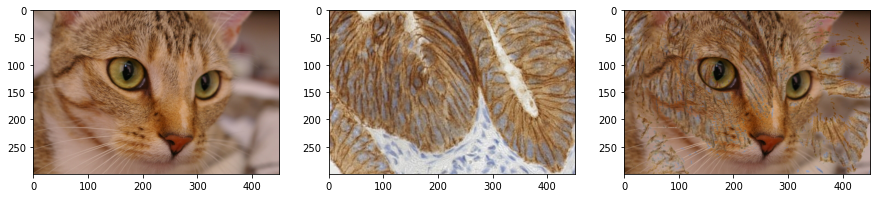

In [387]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)
axarr[2].imshow(image_c)

### Resta clampeada en RGB

In [388]:
image_c = clampled_substract_RGB(image_a, image_b)

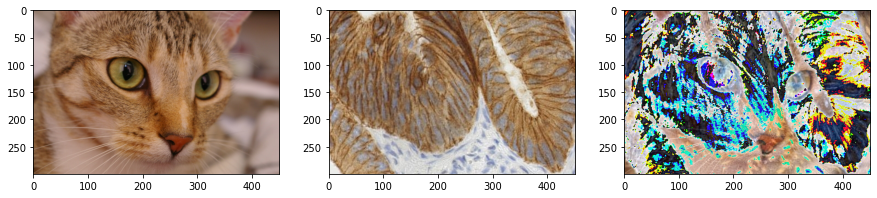

In [389]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)
axarr[2].imshow(image_c)

### Resta promediada en RGB

In [390]:
image_c = averaged_substract_RGB(image_a, image_b)

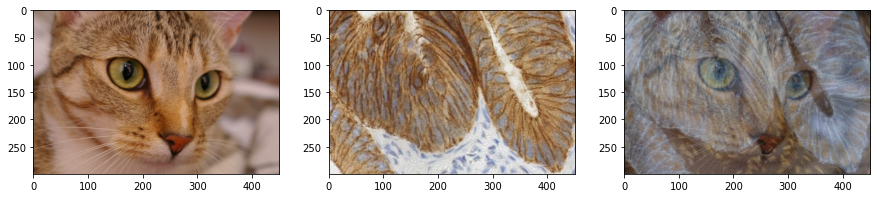

In [391]:
_, axarr = plt.subplots(1, 3, figsize=(15,15))
axarr[0].imshow(image_a)
axarr[1].imshow(image_b)
axarr[2].imshow(image_c)